<a href="https://colab.research.google.com/github/windopper/NerualNetworkPracticeInJupyter/blob/main/RecurrentNeuralNetwork/understanding_SimpleRNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스의 SimpleRNN과 LSTM 이해하기

reference https://wikidocs.net/106473

In [65]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

train_x = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_x))

(4, 5)


 단어 벡터의 차원은 5이고, 문장의 길이가 4인 경우을 가정한 입력

 다시 말하자면 4번의 시점(timesteps)이 존재하고, 각 시점마다 5차원의 단어 벡터가 입력으로 사용된다는 의미

 그러나 RNN은 2D텐서가 아니라 3D텐서를 입력으로 받으므로 배치 크기 1을 추가해줌으로서 해결

In [67]:
train_x = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_x = np.array(train_x, dtype=np.float32)
print(np.shape(train_x))

(1, 4, 5)


이로써, (batch_size, timesteps, input_dim)에 해당되는 (1, 4, 5)의 크기를 가지는 3D텐서가 생성됨.

batch_size는 한번에 RNN이 학습하는 데이터의 양을 의미하지만 , 여기서는 샘플이 1개 밖에 없으므로 batch_size는 1

# SimpleRNN 이해하기

In [84]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False) 와 동일함

hidden_state = rnn(train_x)
print('hidden state : {}, shape : {}'.format(hidden_state, hidden_state.shape))

hidden state : [[ 0.11352578  0.98177195 -0.78216296]], shape : (1, 3)


(1, 3)크기의 텐서가 출력되는데 이는 마지막 시점의 은닉상태

이번에는 return_sequences를 True로 지정하여 모든 시점의 은닉 상태를 출력

In [85]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_x)

print('hidden state : {}, shape : {}'.format(hidden_states, hidden_states.shape))

hidden state : [[[ 0.03659699  0.9955817  -0.9559208 ]
  [ 0.31270948  0.99909306 -0.9983187 ]
  [-0.39232823  0.9986649  -0.99312466]
  [ 0.87082475  0.97499144 -0.9201381 ]]], shape : (1, 4, 3)


(1, 4, 3) 크기의 텐서가 출력됨. 입력 데이터는 (1, 4, 5)의 크기를 가지는 3D텐서였고, 그 중 4가 시점(timestep)에 해당 되므로 모든 시점에 대해서 은닉 상태의 값을 출력하여 ( 1, 4, 3)크기의 텐서를 출력함


return_state가 True일 경우에는 return_sequences의 True/False 여부와 상관없이 마지막 시점의 은닉 상태를 출력함.


만약 return_sequences가 True이면서, return_state를 True로 할 경우 SimpleRNN은 두개의 출력을 리턴함

In [86]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_x)

print('hidden states : {}, shape : {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape : {}'.format(last_state, last_state.shape))

hidden states : [[[-0.8241027  -0.9999597  -0.9249744 ]
  [-0.97959733 -0.9980392  -0.98319316]
  [-0.9971735  -0.6216846  -0.686289  ]
  [-0.9514846  -0.55047315 -0.86701465]]], shape : (1, 4, 3)
last hidden state : [[-0.9514846  -0.55047315 -0.86701465]], shape : (1, 3)


hidden_states의 마지막 출력 벡터값이 last_hidden_state의 벡터값과 일치한 것을 볼 수 있음



return_sequences는 False인데 , return_state가 True인 경우

In [87]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_x)

print('hidden states : {}, shape : {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape : {}'.format(last_state, last_state.shape))

hidden states : [[ 0.44752514 -0.99799025 -0.6694892 ]], shape : (1, 3)
last hidden state : [[ 0.44752514 -0.99799025 -0.6694892 ]], shape : (1, 3)


두 개의 출력 모두 마지막 시점의 은닉 상태를 출력함

# LSTM 이해하기

SimpleRNN이 사용되는 경우는 거의 없으므로 이번에는 LSTM을 사용한 경우를 살펴보면

In [89]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_x)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[-0.22877376  0.00613023 -0.4752859 ]], shape: (1, 3)
last hidden state : [[-0.22877376  0.00613023 -0.4752859 ]], shape: (1, 3)
last cell state : [[-1.2831904   0.09631445 -0.64797324]], shape: (1, 3)


return_sequences가 False 이므로 첫번째 결과는 마지막 시점의 은닉 상태. LSTM이 SimpleRNN과 다른 이유는 셀 상태까지 반환함

이번에 return_sequences를 True로 바꾸면

In [90]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_x)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[ 0.20895231  0.04408051  0.07333086]
  [ 0.19795233  0.15687373  0.04663192]
  [ 0.08002341  0.17084274  0.19918102]
  [-0.18655093  0.16604623  0.11696394]]], shape: (1, 4, 3)
last hidden state : [[-0.18655093  0.16604623  0.11696394]], shape: (1, 3)
last cell state : [[-0.2901226   0.63371986  1.2011511 ]], shape: (1, 3)


return_state가 True이므로 두번째 출력값이 마지막 은닉 상태, 세번째 출력값이 마지막 셀 상태인 것은 변함없지만 return_sequences가 True이므로 첫번째 출력값은 모든 시점의 은닉 상태가 출력됨

# Bidirectional(LSTM) 이해하기

return_sequences가 True인 경우와 False 인 경우에 대해서 은닉 상태의 값이 어떻게 바뀌는지 비교하기 위하여 출력되는 은닉 상태의 값을 고정시키면

In [93]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

return_sequences가 False이고 return_state가 True인 경우

In [94]:
bilstm = Bidirectional(LSTM(3,
                            return_sequences=False,
                            return_state=True,
                            kernel_initializer=k_init,
                            bias_initializer=b_init,
                            recurrent_initializer=r_init
                            ))

hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_x)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.63031393 0.63031393 0.63031393 0.7038734  0.7038734  0.7038734 ]], shape: (1, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


return_sequences가 False인 경우 정방향 LSTM의 마지막 시점의 은닉상태와 역방향 LSTM의 첫번째 시점의 은닉상태가 연결된 채 반환됨

원리 그림

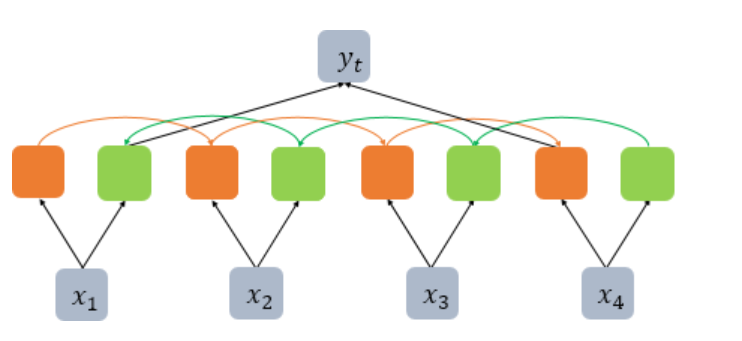

return_sequences가 True이고 return_state가 True인 경우

In [95]:
bilstm = Bidirectional(LSTM(3,
                            return_sequences=True,
                            return_state=True,
                            kernel_initializer=k_init,
                            bias_initializer=b_init,
                            recurrent_initializer=r_init
                            ))

hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_x)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.5511133  0.5511133  0.5511133  0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.63031393 0.63031393 0.63031393 0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


return_sequences가 True인 경우 역방향 LSTM의 첫번째 시점의 은닉상태가 정방향 LSTM의 마지막 시점의 은닉 상태와 연결되지 않고 첫번재 시점의 은닉 상태와 연결됨

원리 그림

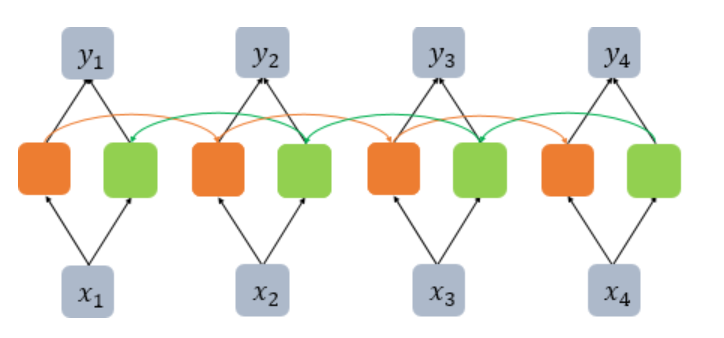